# Betting strategies 
## _England Premiere League Results & Odds Dataset_

### I. Introduction

> You do not know anything about sports betting or you want to implement a new strategy? This notebook will help you understand this world, and also provide you a **betting strategy** that you will be able to apply on your own.

In this report, we will take the example of Football, the sport with the highest number of bets. More precisely, we will concentrate on **England Premiere League results**, because its great number of matches will allow us to test and build a strong strategy. 

##### Explanations on betting's vocabulary
First, let's set up the vocabulary. While betting,  _odds_ are linked to each bet you make. Betting odds tell you how likely an event is to happen, and represents how much money you could win if your bet realizes itself.
There is the possibility to bet on different type of results before a match. Here, we will take into account these type of bets: the one on the number of goals, the other on the match result (Home team wins, Away team wins, Draw match).


#### First, we imported some extensions that will be useful for this notebook. As you can see we imported :

> 1. numpy (...)
> 2. matplotlib (...)
> 3. pandas (...)
> 5. seaborn (...)
> 6. sklearn (...)

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
%load_ext autoreload
%autoreload 2
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")

#### Dataset

The dataset we chose groups the results of these matches since 2008 with data like date time, Home team/Away team, the goals, the match result, the referee for the match etc. There are also odds set on matches' results or number of goals, taken from different betting sites.

The following is the dataset, in a csv file, that we decided to call _data_.

In [2]:
#We use the Dataset with the games of the season 2018
data = pd.read_csv('https://raw.githubusercontent.com/abdul232/DMML_Team_Rolex/master/data/England_2008_2018_Premiere_League.csv', sep=';')

data = data.sort_values(by="Match_ID",ascending=True)
# view the first 10 rows 
data

,Match_ID,Date,HomeTeam,AwayTeam,Home ex-Rank,Home Team Goals,Away ex-Rank,Away Team Goals,Match Result,Referee,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,Unnamed: 70,Unnamed: 71,Unnamed: 72
0,1,16.08.08,Arsenal,West Brom,6,1,18,0,H,H Webb,...,"2,14",26,"-1,5","1,88","1,81","2,12","1,97",NaN,NaN,NaN
1,2,16.08.08,Bolton,Stoke,16,3,19,1,H,C Foy,...,"1,64",27,0,"1,35","1,31","3,56","3,27",NaN,NaN,NaN
2,3,16.08.08,Everton,Blackburn,5,2,7,3,A,A Marriner,...,"1,63",28,0,"1,73","1,43","3,05","2,76",NaN,NaN,NaN
3,4,16.08.08,Hull,Fulham,20,2,17,1,H,P Walton,...,"1,64",26,0,"1,91","1,85","2,07","1,94",NaN,NaN,NaN
4,5,16.08.08,Middlesbrough,Tottenham,13,2,11,1,H,M Atkinson,...,"1,92",27,0,"2,45","2,3","1,65","1,58",NaN,NaN,NaN
5,6,16.08.08,Sunderland,Liverpool,15,0,4,1,A,A Wiley,...,"1,69",26,"0,75","1,97","1,93","1,99","1,94",NaN,NaN,NaN
6,7,16.08.08,West Ham,Wigan,10,2,14,1,H,S Bennett,...,"1,68",27,0,"1,43","1,39","3,2","2,82",NaN,NaN,NaN
7,8,17.08.08,Aston Villa,Man City,6,4,9,2,H,P Dowd,...,"1,66",25,0,"1,4","1,36","3,25","2,95",NaN,NaN,NaN
8,9,17.08.08,Chelsea,Portsmouth,2,4,8,0,H,M Dean,...,"1,83",25,"-1,5","2,19","2,1","1,8","1,75",NaN,NaN,NaN
9,10,17.08.08,Man United,Newcastle,1,1,12,1,D,M Riley,...,"2,03",25,"-1,5","2,08","2,02","1,91","1,83",NaN,NaN,NaN


In [3]:
data.shape

(4180, 73)

In [4]:
#We have to drop the two lasts rows because they are NaN
#data = data.drop([4180, 4181])

#We have a new dimension
#data.shape

This dataset without the _NaN counts_ **4'180** rows for **47** columns.

Now, let's set up the **types of the variables**. We will change some as int (integer), the date as datetime, while other will remain objects.

In [16]:
data.dtypes

Match_ID                      int64
Date                         object
HomeTeam                     object
AwayTeam                     object
Home ex-Rank                  int64
Home Team Goals               int64
Away ex-Rank                  int64
Away Team Goals               int64
Referee                      object
Home Team Shots               int64
Away Team Shots               int64
Home Team Shots on Target     int64
Away Team Shots on Target     int64
Home Fouls Committed          int64
Away Fouls Committed          int64
HC                            int64
AC                            int64
HY                            int64
AY                            int64
HR                            int64
AR                            int64
B365H                        object
B365D                        object
B365A                        object
BWH                          object
BWD                          object
BWA                          object
GBH                         

In [17]:
#We have to change the type of some variable
data['Match_ID'] = data.Match_ID.astype(int)

In [19]:
#We have to change the type of some variable
data['Date'] = pd.to_datetime(data['Date'],)


In [20]:
#We have to change the type of some variable
data[['Home Team Goals', 'Away Team Goals', 'Home Team Shots','Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Fouls Committed', 'Away Fouls Committed', 'Home Corners', 'Away Corners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Away Red Cards']]= data[['Home Team Goals', 'Away Team Goals', 'Home Team Shots','Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Fouls Committed', 'Away Fouls Committed', 'Home Corners', 'Away Cornners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Away Red Cards']].astype(int)

KeyError: "['Away Cornners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Home Corners', 'Away Red Cards'] not in index"

In [21]:
data.dtypes

Match_ID                              int64
Date                         datetime64[ns]
HomeTeam                             object
AwayTeam                             object
Home ex-Rank                          int64
Home Team Goals                       int64
Away ex-Rank                          int64
Away Team Goals                       int64
Referee                              object
Home Team Shots                       int64
Away Team Shots                       int64
Home Team Shots on Target             int64
Away Team Shots on Target             int64
Home Fouls Committed                  int64
Away Fouls Committed                  int64
HC                                    int64
AC                                    int64
HY                                    int64
AY                                    int64
HR                                    int64
AR                                    int64
B365H                                object
B365D                           

### Regressions

To build a betting strategy, it is first relevant to know how frequently the betting companies makes right predicting or not. So, in order to undertand this fact, we will build three different scatter plot :
> * when the official result is the victory of the home team crossed with the "Home team win" odd.
> * When the official result is the victory of the away team crossed with the match result with the "Away team win" odd.
> * When the official result is draw crossed with the "Draw"odd.

Each graph will show the odds of all the betting websites, to compare them.

#### Normalistion
As first steps we will normalise the odds to have a better comparison :


In [22]:
#We would like to do 3 different regression, one for the Home team wins, one for the draws and one for the Away team wins
data = pd.get_dummies(data, columns=['Match Result'])

KeyError: "None of [Index(['Match Result'], dtype='object')] are in the [columns]"

In [11]:
data.dtypes

Match_ID                      int64
Date                         object
HomeTeam                     object
AwayTeam                     object
Home ex-Rank                  int64
Home Team Goals               int64
Away ex-Rank                  int64
Away Team Goals               int64
Referee                      object
Home Team Shots               int64
Away Team Shots               int64
Home Team Shots on Target     int64
Away Team Shots on Target     int64
Home Fouls Committed          int64
Away Fouls Committed          int64
HC                            int64
AC                            int64
HY                            int64
AY                            int64
HR                            int64
AR                            int64
B365H                        object
B365D                        object
B365A                        object
BWH                          object
BWD                          object
BWA                          object
GBH                         

In [12]:
from sklearn import preprocessing
# separate the data from the target attributes
#X = data['B365 Home','B365 Draw','B365 Away','Bet&Win Home','Bet&Win Draw','Bet&Win Away','Interwetten Home','Iterwetten Draw','Interwetten Away','William Hill Home','William Hill Draw','William Hill Away','VC Bet Home','VC Bet Draw','VC Bet Away']
# normalisation par formule (x - x.min()) / (x.max() - x.min())
cols_to_norm = ['B365 Home','B365 Draw','B365 Away','Bet&Win Home','Bet&Win Draw','Bet&Win Away','Interwetten Home','Iterwetten Draw','Interwetten Away','William Hill Home','William Hill Draw','William Hill Away','VC Bet Home','VC Bet Draw','VC Bet Away']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) 
data[cols_to_norm].head(10)

KeyError: "None of [Index(['B365 Home', 'B365 Draw', 'B365 Away', 'Bet&Win Home', 'Bet&Win Draw',\n       'Bet&Win Away', 'Interwetten Home', 'Iterwetten Draw',\n       'Interwetten Away', 'William Hill Home', 'William Hill Draw',\n       'William Hill Away', 'VC Bet Home', 'VC Bet Draw', 'VC Bet Away'],\n      dtype='object')] are in the [columns]"

In [13]:
round(data[cols_to_norm],3).head(10)

KeyError: "None of [Index(['B365 Home', 'B365 Draw', 'B365 Away', 'Bet&Win Home', 'Bet&Win Draw',\n       'Bet&Win Away', 'Interwetten Home', 'Iterwetten Draw',\n       'Interwetten Away', 'William Hill Home', 'William Hill Draw',\n       'William Hill Away', 'VC Bet Home', 'VC Bet Draw', 'VC Bet Away'],\n      dtype='object')] are in the [columns]"

#### Plot with seaborn

Then we build a first scatter plot, we used seaborn and the betting website B365, when the Home team wins :

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


#tips = sns.load_dataset(data)

a_B365_Home = sns.scatterplot(x="B365 Home", y="Match Result_H", data=data)

a_BetWin_Home = sns.scatterplot(x="Bet&Win Home", y="Match Result_H", data=data)

a_Interwetten_Home = sns.scatterplot(x="Interwetten Home", y="Match Result_H", data=data)

a_WilliamHill_Home = sns.scatterplot(x="William Hill Home", y="Match Result_H", data=data)

a_VCBet_Home = sns.scatterplot(x="VC Bet Home", y="Match Result_H", data=data)

a_VCBet_Home.set(xlabel='Website Odd while Home Team wins', ylabel='Home team won [1]')


ValueError: Could not interpret input 'B365 Home'

In [15]:
a_B365_Away = sns.scatterplot(x="B365 Away", y="Match Result_A", data=data)

a_BetWin_Away = sns.scatterplot(x="Bet&Win Away", y="Match Result_A", data=data)

a_Interwetten_Away = sns.scatterplot(x="Interwetten Away", y="Match Result_A", data=data)

a_WilliamHill_Away = sns.scatterplot(x="William Hill Away", y="Match Result_A", data=data)

a_VCBet_Away = sns.scatterplot(x="VC Bet Away", y="Match Result_H", data=data)

a_VCBet_Away.set(xlabel='Website Odd while Away Team wins', ylabel='Away team won [1]')


ValueError: Could not interpret input 'B365 Away'

[Text(0, 0.5, 'Draw [1]'), Text(0.5, 0, 'Website Odd while Draw match')]

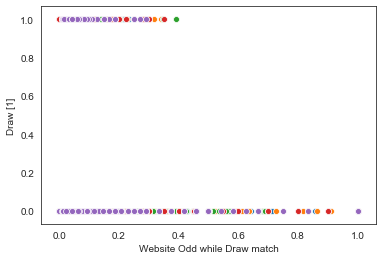

In [29]:
a_B365_Draw = sns.scatterplot(x="B365 Draw", y="Match Result_D", data=data)

a_BetWin_Draw = sns.scatterplot(x="Bet&Win Draw", y="Match Result_D", data=data)

a_Interwetten_Draw = sns.scatterplot(x="Iterwetten Draw", y="Match Result_D", data=data)

a_WilliamHill_Draw = sns.scatterplot(x="William Hill Draw", y="Match Result_D", data=data)

a_VCBet_Draw = sns.scatterplot(x="VC Bet Draw", y="Match Result_D", data=data)

a_VCBet_Draw.set(xlabel='Website Odd while Draw match', ylabel='Draw [1]')

# Comparison between two models

We will compare two model:

> - Logistic Regressions comparing the Odd prediction to the statistics of the match prediction
> - Decision Trees comparing the Odd prediction to the statistics of the match prediction
## Logistic Regression - Odds

**Here is the 1st logistic regression for Home Team Win:**

In [30]:
feature_names = ['B365 Home','Bet&Win Home','Interwetten Home','William Hill Home','VC Bet Home']

X = np.array(data[feature_names])
y = np.array(data["Match Result_H"])

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)


In [32]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LR = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [33]:
LR.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [34]:
# best regulariser parameter
LR.C_

array([10000.])

In [35]:
# train accuracy
LR.score(X_train,y_train)

0.6414473684210527

In [36]:
# test accuracy
LR.score(X_test, y_test)

0.6973684210526315

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LR.predict(X_train))

array([[ 82,  73],
       [ 36, 113]])

Confusion matrix, without normalization


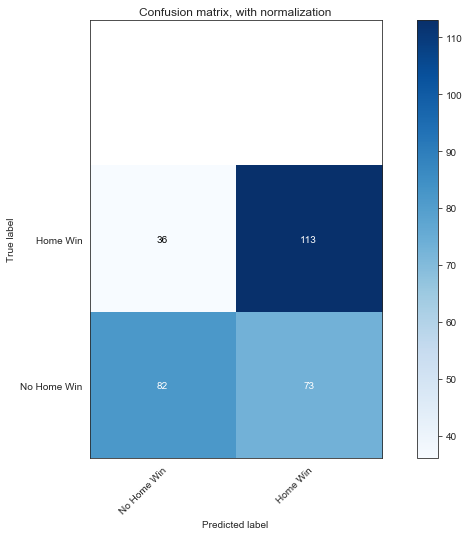

In [38]:
# Normalized confusion matrix, (code from the Lab 5.0)
from sklearn.utils.multiclass import unique_labels

y_pred = LR.predict(X_train)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    
    ax.xaxis.set_ticklabels(["No Home Win", "Home Win"])
    ax.yaxis.set_ticklabels(["No Home Win", "Home Win"])
    return ax


np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_pred, classes = y[unique_labels(y_train, y_pred)],title='Confusion matrix, with normalization')


In [39]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred, pos_label='Yes')

print(Precision)


Recall = recall_score(y_train, y_pred, pos_label='Yes')

print(Recall)


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1243: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label='Yes' is not a valid label: array([0, 1], dtype=uint8)

**Here is the 2nd logistic regression for Draws:**

In [18]:
feature_names = ['B365 Draw','Bet&Win Draw','Iterwetten Draw','William Hill Draw','VC Bet Draw']

X = np.array(data[feature_names])
y = np.array(data["Match Result_D"])

KeyError: 'Match Result_D'

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

NameError: name 'y' is not defined

In [58]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LR = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [59]:
LR.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [60]:
# best regulariser parameter
LR.C_

array([0.])

In [62]:
# train accuracy
LR.score(X_train,y_train)

0.8289473684210527

In [63]:
# test accuracy
LR.score(X_test, y_test)

0.75

In [64]:
LR.score(X_train,y_train)

0.9953454399269277

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LR.predict(X_train))

array([[252,   0],
       [ 52,   0]])

Confusion matrix, with normalization


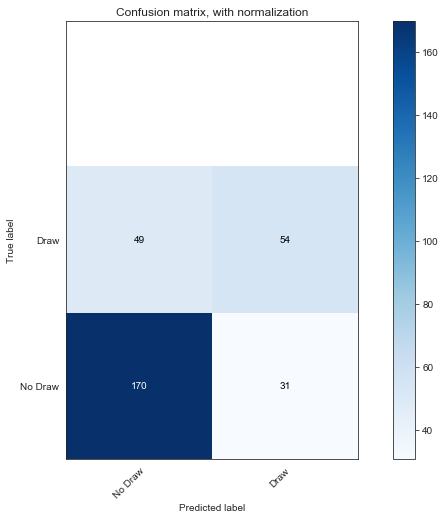

In [77]:
# Normalized confusion matrix, (code from the Lab 5.0)
from sklearn.utils.multiclass import unique_labels

y_pred = LR.predict(X_train)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    
    ax.xaxis.set_ticklabels(["No Draw", "Draw"])
    ax.yaxis.set_ticklabels(["No Draw", "Draw"])
    return ax


np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_pred, classes = y[unique_labels(y_train, y_pred)],title='Confusion matrix, with normalization')



**Here is the 3rd logistic regression for Away wins:**

In [67]:
feature_names = ['B365 Away','Bet&Win Away','Interwetten Away','William Hill Away','VC Bet Away']

X = np.array(data[feature_names])
y = np.array(data["Match Result_A"])

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [69]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LR = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [70]:
LR.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [71]:
# best regulariser parameter
LR.C_

array([1291.55])

In [72]:
# train accuracy
LR.score(X_train,y_train)

0.7368421052631579

In [73]:
# test accuracy
LR.score(X_test, y_test)

0.7763157894736842

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LR.predict(X_train))

array([[170,  31],
       [ 49,  54]])

Confusion matrix, with normalization


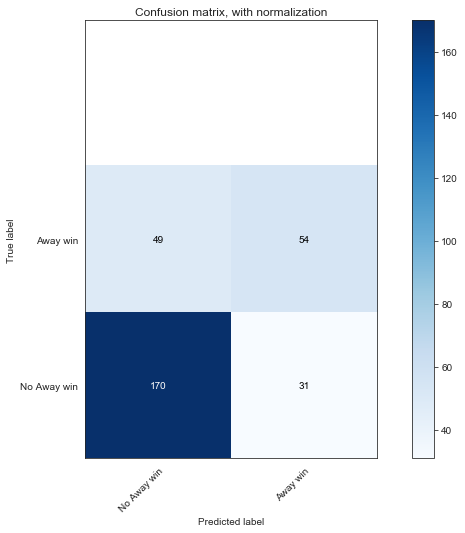

In [76]:
# Normalized confusion matrix, (code from the Lab 5.0)
from sklearn.utils.multiclass import unique_labels

y_pred = LR.predict(X_train)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    
    ax.xaxis.set_ticklabels(["No Away win", "Away win"])
    ax.yaxis.set_ticklabels(["No Away win", "Away win"])
    return ax


np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_pred, classes = y[unique_labels(y_train, y_pred)],title='Confusion matrix, with normalization')



## Logistic Regression - Statistics
**Logistic Regression for Home winwith statistics**


In [78]:
feature_names = ["Home ex-rank","Home Team Shots","Away ex-rank", "Away Team Shots","Home Team Shots on Target", "Away Team Shots on Target", "Home Fouls Committed", "Away Fouls Committed", "Home Corners", "Away Cornners", "Home Yellow Cards", "Away Yellow Cards", "Home Red Cards", "Away Red Cards"]
#feature_names = ['B365 Home']
X = np.array(data[feature_names])
y = np.array(data["Match Result_H"])

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [103]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LR_MS = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [104]:
LR_MS.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [105]:
# best regulariser parameter
LR_MS.C_

array([0.01])

In [106]:
# train accuracy
LR_MS.score(X_train,y_train)

0.8092105263157895

In [107]:
# test accuracy
LR_MS.score(X_test, y_test)

0.7105263157894737

**Logistic Regression for Draws with statistics**

In [108]:
feature_names = ["Home ex-rank","Home Team Shots","Away ex-rank", "Away Team Shots","Home Team Shots on Target", "Away Team Shots on Target", "Home Fouls Committed", "Away Fouls Committed", "Home Corners", "Away Cornners", "Home Yellow Cards", "Away Yellow Cards", "Home Red Cards", "Away Red Cards"]
#feature_names = ['B365 Home']
X = np.array(data[feature_names])
y = np.array(data["Match Result_D"])

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [110]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LR_MS = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [111]:
LR_MS.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [112]:
# best regulariser parameter
LR_MS.C_

array([0.01])

In [113]:
# train accuracy
LR_MS.score(X_train,y_train)

0.8322368421052632

In [114]:
# test accuracy
LR_MS.score(X_test, y_test)

0.75

**Logistic Regression for Away win with statistics**

In [115]:
feature_names = ["Home ex-rank","Home Team Shots","Away ex-rank", "Away Team Shots","Home Team Shots on Target", "Away Team Shots on Target", "Home Fouls Committed", "Away Fouls Committed", "Home Corners", "Away Cornners", "Home Yellow Cards", "Away Yellow Cards", "Home Red Cards", "Away Red Cards"]
#feature_names = ['B365 Home']
X = np.array(data[feature_names])
y = np.array(data["Match Result_A"])

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [117]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LR_MS = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [118]:
LR_MS.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [119]:
# best regulariser parameter
LR_MS.C_

array([0.01])

In [120]:
# train accuracy
LR_MS.score(X_train,y_train)

0.8092105263157895

In [121]:
# test accuracy
LR_MS.score(X_test, y_test)

0.7105263157894737

## Decision Trees - Odds

**Decision Tree for Home win**

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
feature_names = ['B365 Home','Bet&Win Home','Interwetten Home','William Hill Home','VC Bet Home']

X = data[feature_names]
y = data["Match Result_H"]


In [124]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [125]:
clf = DecisionTreeClassifier(criterion='entropy')

In [126]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [127]:
# test accuracy
clf.score(X_test,y_test)

0.5789473684210527

In [128]:
# depth of the decision tree
clf.get_depth()

20

# Decision Trees - Match Statistics

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
feature_names = ['Home ex-rank', 'Home Team Shots', 'Away ex-rank', 'Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Fouls Committed', 'Away Fouls Committed', 'Home Corners', 'Away Cornners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Away Red Cards']

X = np.array(data[feature_names])
y = np.array(data["Match Result_H"])

In [131]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [132]:
clf = DecisionTreeClassifier(criterion='entropy')

In [133]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [134]:
# test accuracy
clf.score(X_test,y_test)

0.6052631578947368

In [135]:
# depth of the decision tree
clf.get_depth()

14